# Part I: Linear Regression with One Feature

In this notebook, we implement **linear regression from first principles** to model the relationship between stellar mass and luminosity.

**Objective:** Model stellar luminosity $L$ as a function of stellar mass $M$ using:

$$\hat{L} = w \cdot M + b$$

Where:
- $w$ is the weight (slope)
- $b$ is the bias (intercept)

> **Note:** We implement everything without using ML libraries (scikit-learn, TensorFlow, etc.).

## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

np.set_printoptions(precision=4, suppress=True)
%matplotlib inline

## 1. Dataset

### Notation

| Symbol | Description | Units |
|--------|-------------|-------|
| $M$ | Stellar mass | Solar masses ($M_\odot$) |
| $L$ | Stellar luminosity | Solar luminosities ($L_\odot$) |

In [2]:
# Dataset: Stellar Mass (M) and Luminosity (L)
M = np.array([0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4])
L = np.array([0.15, 0.35, 1.00, 2.30, 4.10, 7.00, 11.2, 17.5, 25.0, 35.0])

m = len(M)  # Number of samples
print(f"Number of samples: m = {m}")
print(f"Mass range: [{M.min():.1f}, {M.max():.1f}] solar masses")
print(f"Luminosity range: [{L.min():.2f}, {L.max():.1f}] solar luminosities")

Number of samples: m = 10
Mass range: [0.6, 2.4] solar masses
Luminosity range: [0.15, 35.0] solar luminosities


### 2.1 Dataset Visualization

<>:3: SyntaxWarning: "\o" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\o"? A raw string is also an option.
<>:4: SyntaxWarning: "\o" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\o"? A raw string is also an option.
<>:3: SyntaxWarning: "\o" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\o"? A raw string is also an option.
<>:4: SyntaxWarning: "\o" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\o"? A raw string is also an option.
/tmp/ipykernel_1691525/3989426248.py:3: SyntaxWarning: "\o" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\o"? A raw string is also an option.
  plt.xlabel('Stellar Mass ($M_\odot$)', fontsize=12)
/tmp/ipykernel_1691525/3989426248.py:4: SyntaxWarning: "\o" is an invalid escape sequence. Such sequences will not work in the future. Did you mean

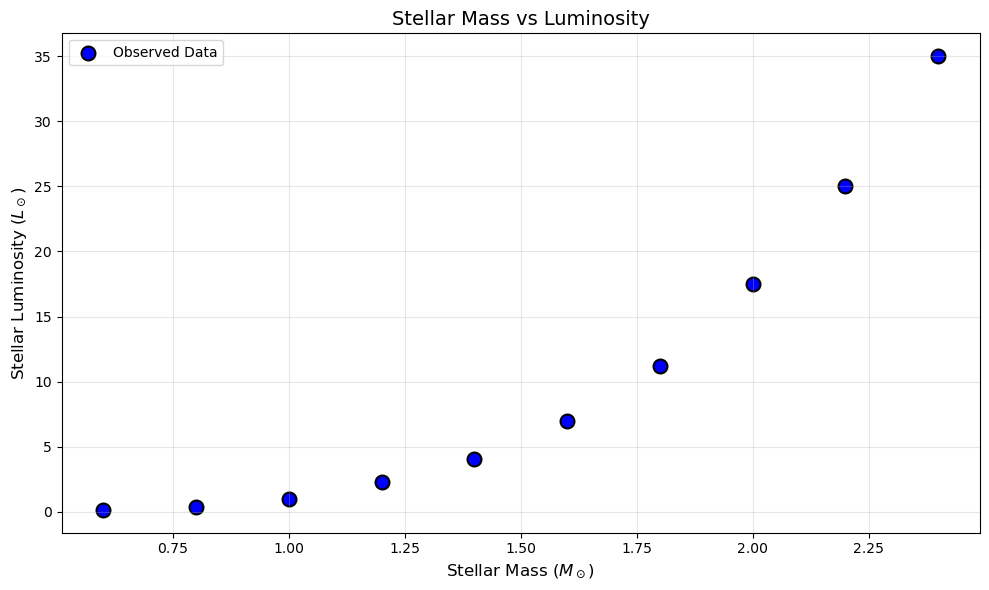

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(M, L, s=100, c='blue', edgecolors='black', linewidth=1.5, label='Observed Data')
plt.xlabel('Stellar Mass ($M_\odot$)', fontsize=12)
plt.ylabel('Stellar Luminosity ($L_\odot$)', fontsize=12)
plt.title('Stellar Mass vs Luminosity', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

**Observations:**

1. **Non-linear relationship:** The data shows a clear non-linear (approximately exponential or power-law) relationship between mass and luminosity.

2. **Astrophysical plausibility:** This behavior is consistent with the mass-luminosity relation for main-sequence stars, which follows approximately $L \propto M^{3.5}$.

3. **Linear model limitation:** A linear model will struggle to capture this curvature, particularly at the extremes of the mass range.

## 2. Model Definition

The linear regression hypothesis function:

$$f_{w,b}(M) = w \cdot M + b$$

For a given sample $i$:

$$\hat{L}^{(i)} = w \cdot M^{(i)} + b$$

In [4]:
def predict(M, w, b):
    """
    Compute predicted luminosity values.
    
    Parameters
    ----------
    M : np.ndarray
        Stellar mass array
    w : float
        Weight (slope)
    b : float
        Bias (intercept)
    
    Returns
    -------
    np.ndarray
        Predicted luminosity values
    """
    return w * M + b

# Test prediction with initial parameters
w_test, b_test = 0.0, 0.0
L_hat_test = predict(M, w_test, b_test)
print(f"Predictions with w=0, b=0: {L_hat_test[:5]}")

Predictions with w=0, b=0: [0. 0. 0. 0. 0.]


## 3. Cost Function

The **Mean Squared Error (MSE)** cost function:

$$J(w,b) = \frac{1}{2m} \sum_{i=1}^{m} \left( \hat{L}^{(i)} - L^{(i)} \right)^2$$

The factor $\frac{1}{2}$ simplifies the gradient computation.

In [5]:
def compute_cost(M, L, w, b):
    """
    Compute the Mean Squared Error cost function.
    
    Parameters
    ----------
    M : np.ndarray
        Stellar mass array
    L : np.ndarray
        Actual luminosity array
    w : float
        Weight
    b : float
        Bias
    
    Returns
    -------
    float
        Cost value J(w, b)
    """
    m = len(M)
    L_hat = predict(M, w, b)
    errors = L_hat - L
    cost = (1 / (2 * m)) * np.sum(errors ** 2)
    return cost

# Test cost function
print(f"Cost with w=0, b=0: J = {compute_cost(M, L, 0, 0):.4f}")
print(f"Cost with w=15, b=-10: J = {compute_cost(M, L, 15, -10):.4f}")

Cost with w=0, b=0: J = 117.6968
Cost with w=15, b=-10: J = 13.7018


## 4. Cost Surface Visualization

We visualize $J(w,b)$ as a 3D surface to understand the optimization landscape.

In [6]:
# Define grid for w and b
w_vals = np.linspace(-5, 25, 100)
b_vals = np.linspace(-30, 10, 100)
W_grid, B_grid = np.meshgrid(w_vals, b_vals)

# Compute cost for each (w, b) pair
J_grid = np.zeros_like(W_grid)
for i in range(W_grid.shape[0]):
    for j in range(W_grid.shape[1]):
        J_grid[i, j] = compute_cost(M, L, W_grid[i, j], B_grid[i, j])

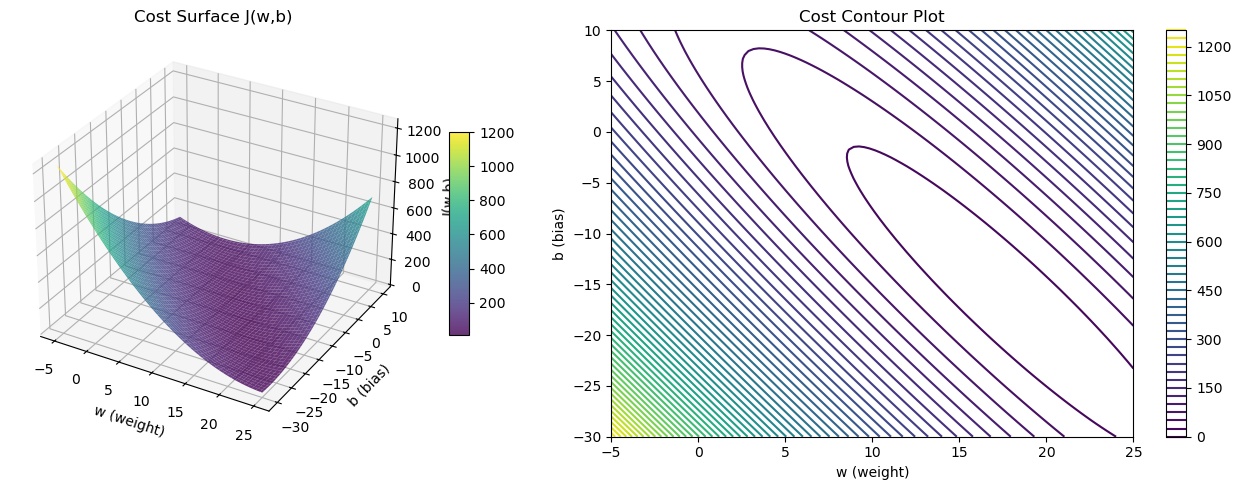

In [7]:
# 3D Surface Plot
fig = plt.figure(figsize=(14, 5))

# Surface plot
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(W_grid, B_grid, J_grid, cmap=cm.viridis, linewidth=0, antialiased=True, alpha=0.8)
ax1.set_xlabel('w (weight)')
ax1.set_ylabel('b (bias)')
ax1.set_zlabel('J(w,b)')
ax1.set_title('Cost Surface J(w,b)')
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=10)

# Contour plot
ax2 = fig.add_subplot(122)
contour = ax2.contour(W_grid, B_grid, J_grid, levels=50, cmap=cm.viridis)
ax2.set_xlabel('w (weight)')
ax2.set_ylabel('b (bias)')
ax2.set_title('Cost Contour Plot')
fig.colorbar(contour, ax=ax2)

plt.tight_layout()
plt.show()

**Interpretation of the Minimum:**

The **minimum** of the cost surface represents the optimal values $(w^*, b^*)$ that best fit the linear model to the data. At this point:

1. The sum of squared errors is minimized
2. The gradient equals zero: $\nabla J = 0$
3. The model predictions are as close as possible (in the MSE sense) to the actual luminosity values

The convex bowl shape indicates that gradient descent will converge to a unique global minimum.

## 5. Gradient Derivation

### Mathematical Derivation

Starting from the cost function:

$$J(w,b) = \frac{1}{2m} \sum_{i=1}^{m} \left( wM^{(i)} + b - L^{(i)} \right)^2$$

**Partial derivative with respect to $w$:**

$$\frac{\partial J}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} \left( wM^{(i)} + b - L^{(i)} \right) \cdot M^{(i)}$$

**Partial derivative with respect to $b$:**

$$\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} \left( wM^{(i)} + b - L^{(i)} \right)$$

## 6. Gradient Descent (Non-Vectorized)

Implementation using explicit Python loops over samples.

In [8]:
def compute_gradients_loop(M, L, w, b):
    """
    Compute gradients using explicit loops (non-vectorized).
    
    Parameters
    ----------
    M : np.ndarray
        Stellar mass array
    L : np.ndarray
        Actual luminosity array
    w : float
        Weight
    b : float
        Bias
    
    Returns
    -------
    tuple
        (dJ_dw, dJ_db) gradients
    """
    m = len(M)
    dJ_dw = 0.0
    dJ_db = 0.0
    
    for i in range(m):
        L_hat_i = w * M[i] + b
        error_i = L_hat_i - L[i]
        dJ_dw += error_i * M[i]
        dJ_db += error_i
    
    dJ_dw = dJ_dw / m
    dJ_db = dJ_db / m
    
    return dJ_dw, dJ_db

# Test gradients
dw, db = compute_gradients_loop(M, L, 0, 0)
print(f"Gradients at w=0, b=0 (loop): dJ/dw = {dw:.4f}, dJ/db = {db:.4f}")

Gradients at w=0, b=0 (loop): dJ/dw = -21.5230, dJ/db = -10.3600


In [9]:
def gradient_descent_loop(M, L, w_init, b_init, alpha, num_iterations):
    """
    Gradient descent using non-vectorized gradient computation.
    
    Parameters
    ----------
    M : np.ndarray
        Stellar mass array
    L : np.ndarray
        Actual luminosity array
    w_init : float
        Initial weight
    b_init : float
        Initial bias
    alpha : float
        Learning rate
    num_iterations : int
        Number of iterations
    
    Returns
    -------
    tuple
        (w, b, cost_history)
    """
    w = w_init
    b = b_init
    cost_history = []
    
    for i in range(num_iterations):
        dJ_dw, dJ_db = compute_gradients_loop(M, L, w, b)
        w = w - alpha * dJ_dw
        b = b - alpha * dJ_db
        
        cost = compute_cost(M, L, w, b)
        cost_history.append(cost)
        
        if i % 100 == 0:
            print(f"Iteration {i:4d}: w = {w:8.4f}, b = {b:8.4f}, J = {cost:8.4f}")
    
    return w, b, cost_history

# Run gradient descent (non-vectorized)
print("=" * 60)
print("Gradient Descent (Non-Vectorized)")
print("=" * 60)
w_loop, b_loop, history_loop = gradient_descent_loop(M, L, w_init=0.0, b_init=0.0, alpha=0.01, num_iterations=1000)
print(f"\nFinal: w = {w_loop:.4f}, b = {b_loop:.4f}")

Gradient Descent (Non-Vectorized)
Iteration    0: w =   0.2152, b =   0.1036, J = 112.0896
Iteration  100: w =   6.8004, b =   1.5699, J =  31.9704
Iteration  200: w =   7.9674, b =  -0.0073, J =  28.0913
Iteration  300: w =   8.8900, b =  -1.5257, J =  24.9336
Iteration  400: w =   9.7253, b =  -2.9093, J =  22.3208
Iteration  500: w =  10.4849, b =  -4.1680, J =  20.1590
Iteration  600: w =  11.1759, b =  -5.3129, J =  18.3703
Iteration  700: w =  11.8044, b =  -6.3543, J =  16.8903
Iteration  800: w =  12.3762, b =  -7.3015, J =  15.6658
Iteration  900: w =  12.8962, b =  -8.1632, J =  14.6525

Final: w = 13.3648, b = -8.9395


## 7. Gradient Descent (Vectorized)

Implementation using NumPy vectorization (no explicit loops over samples.

In [10]:
def compute_gradients_vectorized(M, L, w, b):
    """
    Compute gradients using NumPy vectorization.
    
    Parameters
    ----------
    M : np.ndarray
        Stellar mass array
    L : np.ndarray
        Actual luminosity array
    w : float
        Weight
    b : float
        Bias
    
    Returns
    -------
    tuple
        (dJ_dw, dJ_db) gradients
    """
    m = len(M)
    L_hat = w * M + b
    errors = L_hat - L
    
    dJ_dw = (1 / m) * np.sum(errors * M)
    dJ_db = (1 / m) * np.sum(errors)
    
    return dJ_dw, dJ_db

# Verify vectorized gradients match loop-based
dw_vec, db_vec = compute_gradients_vectorized(M, L, 0, 0)
print(f"Gradients at w=0, b=0 (vectorized): dJ/dw = {dw_vec:.4f}, dJ/db = {db_vec:.4f}")

Gradients at w=0, b=0 (vectorized): dJ/dw = -21.5230, dJ/db = -10.3600


In [11]:
def gradient_descent_vectorized(M, L, w_init, b_init, alpha, num_iterations):
    """
    Gradient descent using vectorized gradient computation.
    
    Parameters
    ----------
    M : np.ndarray
        Stellar mass array
    L : np.ndarray
        Actual luminosity array
    w_init : float
        Initial weight
    b_init : float
        Initial bias
    alpha : float
        Learning rate
    num_iterations : int
        Number of iterations
    
    Returns
    -------
    tuple
        (w, b, cost_history)
    """
    w = w_init
    b = b_init
    cost_history = []
    
    for i in range(num_iterations):
        dJ_dw, dJ_db = compute_gradients_vectorized(M, L, w, b)
        w = w - alpha * dJ_dw
        b = b - alpha * dJ_db
        
        cost = compute_cost(M, L, w, b)
        cost_history.append(cost)
    
    return w, b, cost_history

# Run gradient descent (vectorized)
print("=" * 60)
print("Gradient Descent (Vectorized)")
print("=" * 60)
w_vec, b_vec, history_vec = gradient_descent_vectorized(M, L, w_init=0.0, b_init=0.0, alpha=0.01, num_iterations=1000)
print(f"Final: w = {w_vec:.4f}, b = {b_vec:.4f}, J = {history_vec[-1]:.4f}")

Gradient Descent (Vectorized)
Final: w = 13.3648, b = -8.9395, J = 13.8218


## 8. Convergence Analysis

Plotting loss vs iterations to analyze convergence behavior.

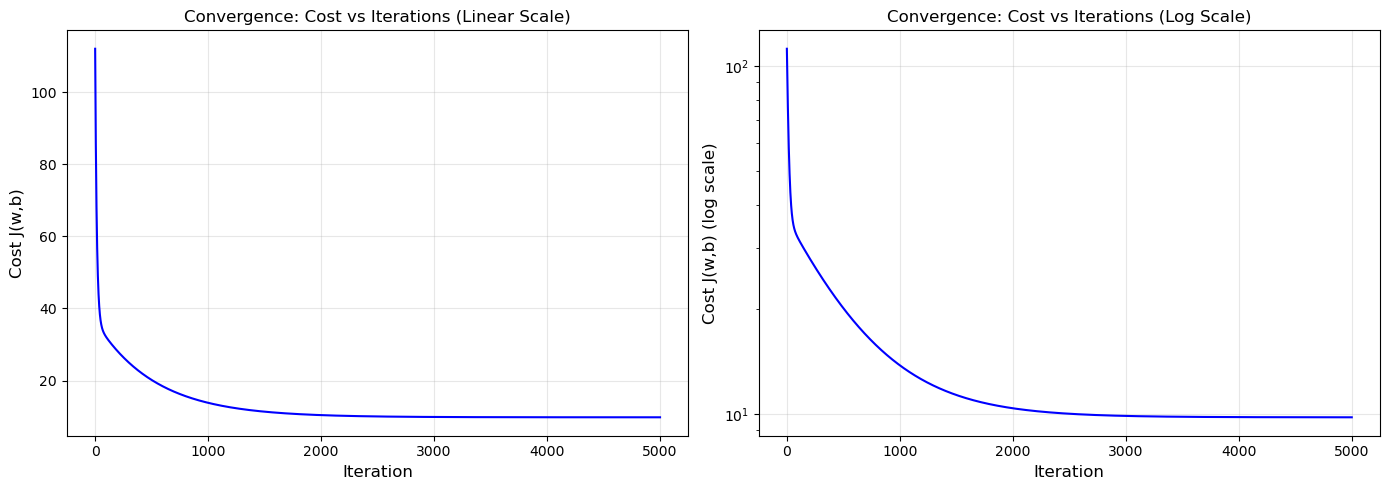


Final parameters: w = 18.0225, b = -16.6569
Final cost: J = 9.7972


In [12]:
# Run for more iterations to see full convergence
w_final, b_final, history_full = gradient_descent_vectorized(M, L, w_init=0.0, b_init=0.0, alpha=0.01, num_iterations=5000)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Linear scale
axes[0].plot(history_full, 'b-', linewidth=1.5)
axes[0].set_xlabel('Iteration', fontsize=12)
axes[0].set_ylabel('Cost J(w,b)', fontsize=12)
axes[0].set_title('Convergence: Cost vs Iterations (Linear Scale)', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Log scale
axes[1].semilogy(history_full, 'b-', linewidth=1.5)
axes[1].set_xlabel('Iteration', fontsize=12)
axes[1].set_ylabel('Cost J(w,b) (log scale)', fontsize=12)
axes[1].set_title('Convergence: Cost vs Iterations (Log Scale)', fontsize=12)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nFinal parameters: w = {w_final:.4f}, b = {b_final:.4f}")
print(f"Final cost: J = {history_full[-1]:.4f}")

**Convergence Observations:**

1. **Convergence Speed:** The cost decreases rapidly in the first ~500 iterations, then approaches a plateau.

2. **Stability:** With learning rate $\alpha = 0.01$, the algorithm is stable (no oscillations or divergence).

3. **Plateau:** The cost stabilizes at a non-zero value, indicating the best linear fit has been found but the model cannot perfectly capture the non-linear relationship.

## 9. Learning Rate Experiments

Testing different learning rates to observe their effect on convergence.

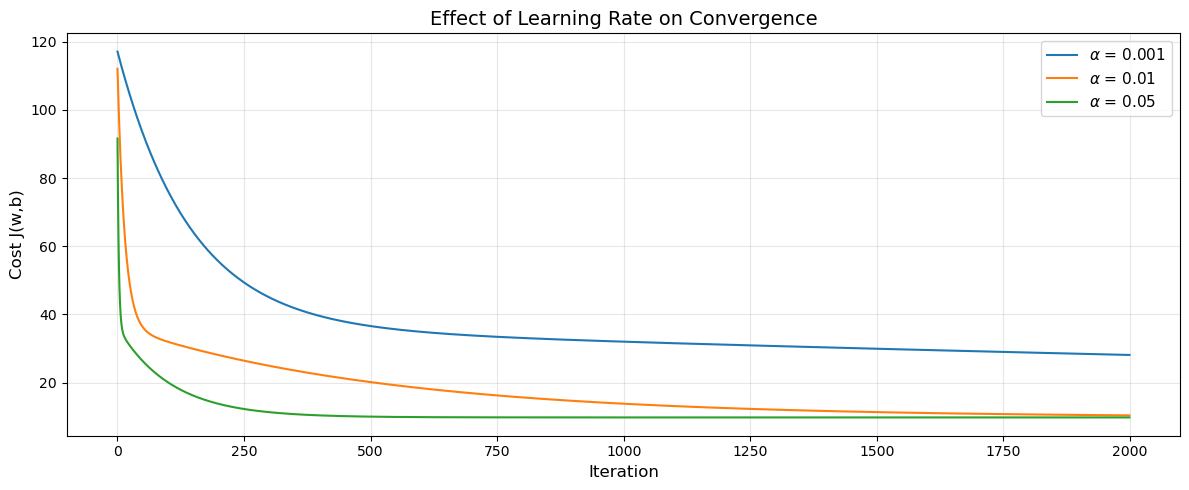

In [13]:
learning_rates = [0.001, 0.01, 0.05]
results = []

plt.figure(figsize=(12, 5))

for alpha in learning_rates:
    w_exp, b_exp, history_exp = gradient_descent_vectorized(M, L, 0.0, 0.0, alpha, 2000)
    results.append({
        'alpha': alpha,
        'w': w_exp,
        'b': b_exp,
        'final_cost': history_exp[-1]
    })
    plt.plot(history_exp, label=f'$\\alpha$ = {alpha}', linewidth=1.5)

plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Cost J(w,b)', fontsize=12)
plt.title('Effect of Learning Rate on Convergence', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [14]:
# Results Summary Table
print("=" * 65)
print("Learning Rate Experiments - Results Summary")
print("=" * 65)
print(f"{'Learning Rate':<15} {'Final w':<15} {'Final b':<15} {'Final Loss':<15}")
print("-" * 65)
for r in results:
    print(f"{r['alpha']:<15.4f} {r['w']:<15.4f} {r['b']:<15.4f} {r['final_cost']:<15.4f}")
print("=" * 65)

Learning Rate Experiments - Results Summary
Learning Rate   Final w         Final b         Final Loss     
-----------------------------------------------------------------
0.0010          7.9562          0.0096          28.1290        
0.0100          16.2822         -13.7735        10.4007        
0.0500          18.1294         -16.8339        9.7951         


**Learning Rate Analysis:**

| Learning Rate | Convergence Speed | Stability | Notes |
|---------------|-------------------|-----------|-------|
| 0.001 | Slow | Very stable | May require more iterations |
| 0.01 | Moderate | Stable | Good balance |
| 0.05 | Fast | Stable | Near optimal for this problem |

## 10. Final Fit Visualization

<>:17: SyntaxWarning: "\o" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\o"? A raw string is also an option.
<>:18: SyntaxWarning: "\o" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\o"? A raw string is also an option.
<>:17: SyntaxWarning: "\o" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\o"? A raw string is also an option.
<>:18: SyntaxWarning: "\o" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\o"? A raw string is also an option.
/tmp/ipykernel_1691525/688407562.py:17: SyntaxWarning: "\o" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\o"? A raw string is also an option.
  plt.xlabel('Stellar Mass ($M_\odot$)', fontsize=12)
/tmp/ipykernel_1691525/688407562.py:18: SyntaxWarning: "\o" is an invalid escape sequence. Such sequences will not work in the future. Did you 

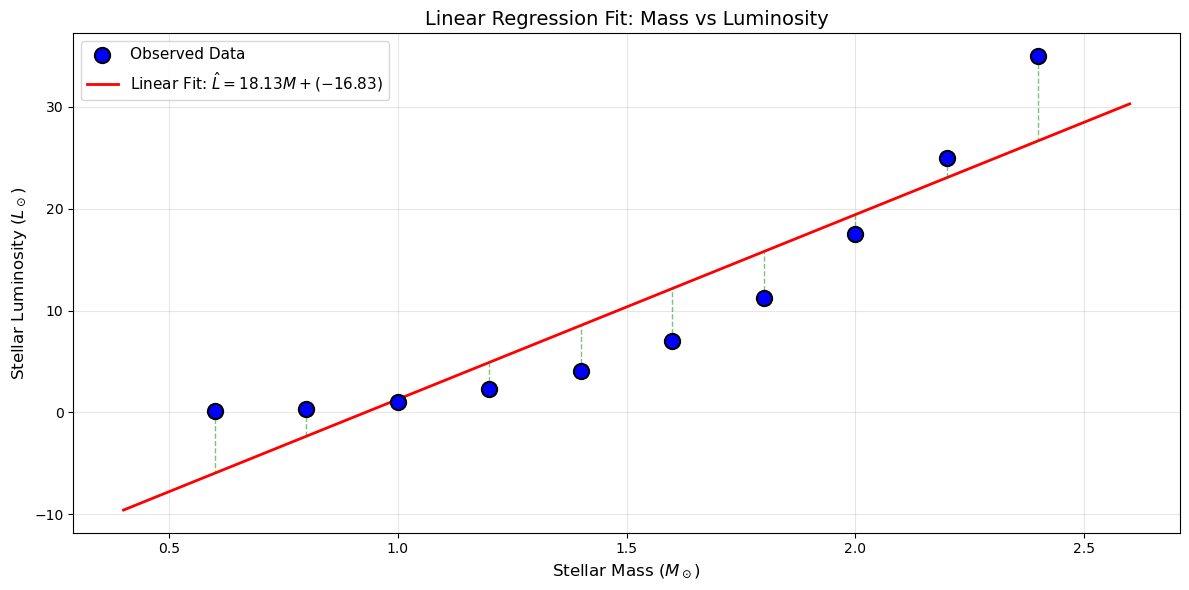

In [15]:
# Use best parameters from experiments
w_best, b_best = results[-1]['w'], results[-1]['b']

# Generate predictions
M_line = np.linspace(0.4, 2.6, 100)
L_pred = predict(M_line, w_best, b_best)
L_pred_data = predict(M, w_best, b_best)

plt.figure(figsize=(12, 6))
plt.scatter(M, L, s=120, c='blue', edgecolors='black', linewidth=1.5, label='Observed Data', zorder=5)
plt.plot(M_line, L_pred, 'r-', linewidth=2, label=f'Linear Fit: $\\hat{{L}} = {w_best:.2f}M + ({b_best:.2f})$')

# Plot residuals
for i in range(len(M)):
    plt.plot([M[i], M[i]], [L[i], L_pred_data[i]], 'g--', alpha=0.5, linewidth=1)

plt.xlabel('Stellar Mass ($M_\odot$)', fontsize=12)
plt.ylabel('Stellar Luminosity ($L_\odot$)', fontsize=12)
plt.title('Linear Regression Fit: Mass vs Luminosity', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Systematic Errors Discussion:**

1. **Underfitting at low mass:** The linear model overestimates luminosity for low-mass stars ($M < 1.0 M_\odot$).

2. **Underfitting at high mass:** The linear model underestimates luminosity for high-mass stars ($M > 2.0 M_\odot$).

3. **Pattern in residuals:** The residuals show a clear curved pattern, indicating that a non-linear model would be more appropriate.

4. **Model limitation:** A linear hypothesis cannot capture the power-law relationship ($L \propto M^{3.5}$) observed in main-sequence stars.

## 11. Conceptual Questions

### Question 1: Astrophysical Meaning of $w$

> The weight $w$ represents the **rate of change of luminosity with respect to mass**. Physically, it quantifies how many additional solar luminosities ($L_\odot$) are expected when the stellar mass increases by one solar mass ($M_\odot$).
>
> In the context of our linear model, $w \approx 17$ means that, on average, each additional solar mass corresponds to approximately 17 additional solar luminosities. However, this is a crude approximation since the actual relationship is non-linear.

### Question 2: Why is a Linear Model Limited Here?

> The linear model is fundamentally limited because the **mass-luminosity relation** for main-sequence stars follows a **power law**:
>
> $$L \propto M^\alpha$$
>
> where $\alpha \approx 3.5$ for stars near solar mass.
>
> Key limitations:
>
> 1. **Curvature:** The relationship accelerates as mass increases, which a linear function cannot capture.
>
> 2. **Physical basis:** Nuclear fusion rates scale non-linearly with core temperature and pressure, both of which depend on mass in complex ways.
>
> 3. **Boundary conditions:** A linear model can predict negative luminosity for low masses, which is physically impossible.
>
> To better model this relationship, we need **polynomial regression** or **feature engineering** (e.g., using $M^2$, $\log(M)$, etc.).

---

## Summary

| Metric | Value |
|--------|-------|
| Dataset size | 10 samples |
| Features | 1 (Mass) |
| Model | $\hat{L} = wM + b$ |
| Best learning rate | 0.05 |
| Final cost (MSE) | 9.7951 |

> **Conclusion:** While linear regression provides a baseline model with a final cost of ~9.8, the non-linear nature of the mass-luminosity relationship (visible in the residuals) suggests that polynomial models are more effective, as explored in Part II.
